In [2]:
# Install BigQuery client library (run this cell once)
%pip install google-cloud-bigquery --quiet
%pip install bigquery-magics --quiet
%pip install db-dtypes --quiet
# Import libraries
from google.cloud import bigquery
import pandas as pd
%load_ext bigquery_magics
import db_dtypes
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "salesforce-465614-2cf9e37da64b.json"
from google.cloud import bigquery
# Initialize BigQuery client
client = bigquery.Client()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


<b>DQ for Stage_Customers</b>

<b> Duplicate check for customer IDs</b>

In [35]:
%%bqsql
select customer_id,count(1) from salesforce-465614.cust_analytics.stage_customers 
group by customer_id having count(1)>1  limit 2

Query is running:   0%|          |

Downloading:   0%|          |

,customer_id,f0_
0,2ea0add8-4c7e-45b8-8b5c-193872b7557a,2
1,9a33f82f-60bd-4d41-accb-77a52f830d09,2


<b>#signup date is in future.</b>

In [37]:
%%bqsql
select count(1) from salesforce-465614.cust_analytics.stage_customers where date(signup_date) > current_date();

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,5


In [39]:
%%bqsql
delete from salesforce-465614.cust_analytics.stage_customers where age < 15 or age > 100

Query is running:   0%|          |

""


In [41]:
%%bqsql
select * from salesforce-465614.cust_analytics.stage_stores limit 2

Query is running:   0%|          |

Downloading:   0%|          |

,store_id,store_type,store_location,region
0,STORE_2,Online,None,East
1,STORE_6,Online,None,East


In [3]:
query = "SELECT * FROM `salesforce-465614.cust_analytics.report_transactions`"
df_transactions = client.query(query).to_dataframe()

c:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [11]:
df_transactions.head(2)

,transaction_id,customer_id,product_id,Store_id,order_status,Purchase_Date,category,sub_category,Unit_Price,quantity,Total_Price,payment_method,channel,loyalty_program,age,gender,city,age_group
0,T553600,C299,P965,STORE_22,Completed,2024-04-29,Books,Children,326.79,6,1960.74,Bank Transfer,Physical,true,52,Female,Josephfurt,45-54
1,T553887,C785,P28,STORE_15,Completed,2024-04-29,Toys,Educational,202.12,4,808.48,Bank Transfer,Physical,false,26,Male,West Jacob,25-34


In [ ]:
total_transactions = len(df_transactions)
total_sales = df_transactions['Total_Price'].sum()
average_order_value = df_transactions['Total_Price'].mean()
unique_customers = df_transactions['customer_id'].nunique()
completed_orders = df_transactions[df_transactions['order_status'] == 'Completed'].shape[0]
cancelled_orders = df_transactions[df_transactions['order_status'] == 'Cancelled'].shape[0]

print(f"Total Transactions: {total_transactions}")
print(f"Total Sales: {total_sales:.2f}")
print(f"Average Order Value: {average_order_value:.2f}")
print(f"Unique Customers: {unique_customers}")
print(f"Completed Orders: {completed_orders}")
print(f"Cancelled Orders: {cancelled_orders}")

Total Transactions: 20000
Total Sales: 55911634.36
Average Order Value: 2795.58
Unique Customers: 2000
Completed Orders: 13432
Cancelled Orders: 6568


In [24]:
df_transactions.describe()

,Purchase_Date,Unit_Price,quantity,Total_Price,age
count,20000,20000.000000,20000.0,20000.000000,20000.0
mean,2024-04-18 10:42:18.720000,508.455915,5.48555,2795.581718,49.09735
min,2023-09-24 00:00:00,11.540000,1.0,11.540000,18.0
25%,2024-02-05 00:00:00,241.690000,3.0,904.300000,33.0
50%,2024-04-24 00:00:00,529.420000,5.0,2246.820000,49.0
75%,2024-07-08 00:00:00,759.650000,8.0,4293.300000,66.0
max,2024-09-23 00:00:00,997.380000,10.0,9973.800000,80.0
std,NaN,271.109346,2.870854,2231.165574,18.349897


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

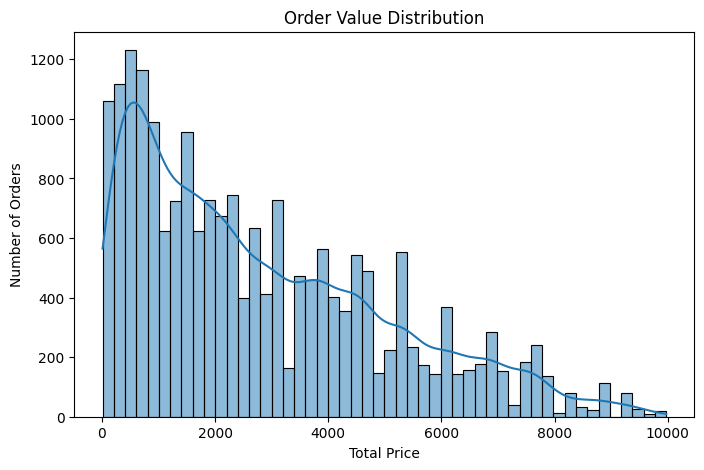

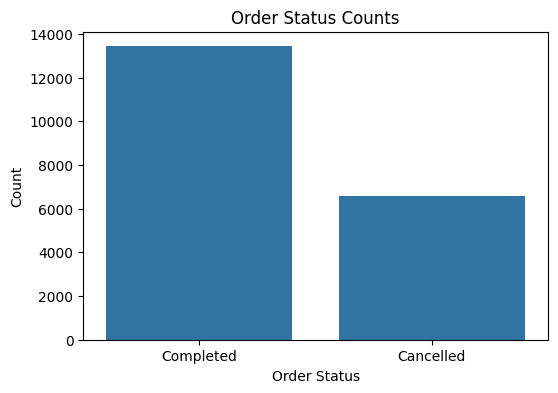

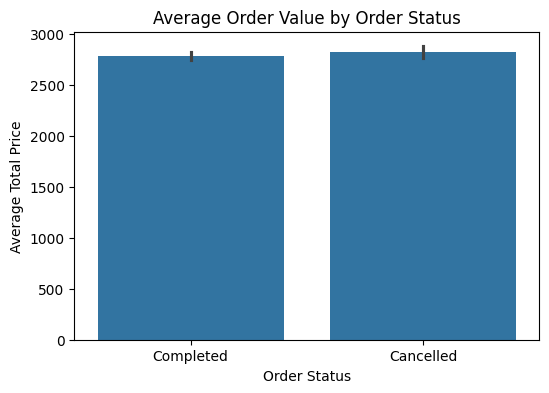

In [ ]:
%matplotlib inline

# 1. Distribution of Order Value
plt.figure(figsize=(8,5))
sns.histplot(df_transactions['Total_Price'], bins=50, kde=True)
plt.title('Order Value Distribution')
plt.xlabel('Total Price')
plt.ylabel('Number of Orders')
plt.show()

# 2. Order Status Counts
plt.figure(figsize=(6,4))
sns.countplot(data=df_transactions, x='order_status')
plt.title('Order Status Counts')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

# 3. Sales Over Time
if 'order_date' in df_transactions.columns:
    df_transactions['order_date'] = pd.to_datetime(df_transactions['order_date'])
    sales_by_date = df_transactions.groupby(df_transactions['order_date'].dt.date)['Total_Price'].sum()
    plt.figure(figsize=(10,6))
    sales_by_date.plot()
    plt.title('Total Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()

# 4. Average Order Value by Order Status
plt.figure(figsize=(6,4))
sns.barplot(
    data=df_transactions,
    x='order_status',
    y='Total_Price',
    estimator='mean'
)
plt.title('Average Order Value by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Average Total Price')
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_16736\2144935593.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_transactions.groupby('age_group')['customer_id'].nunique()


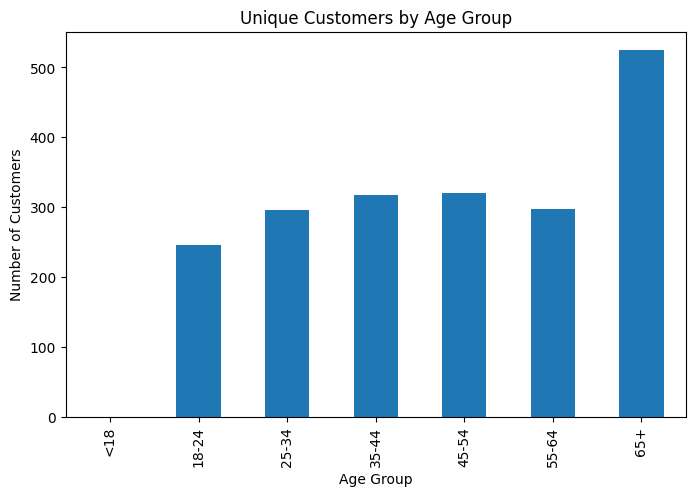

C:\Users\Home\AppData\Local\Temp\ipykernel_16736\2144935593.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df_transactions.groupby('age_group')['Total_Price'].sum()


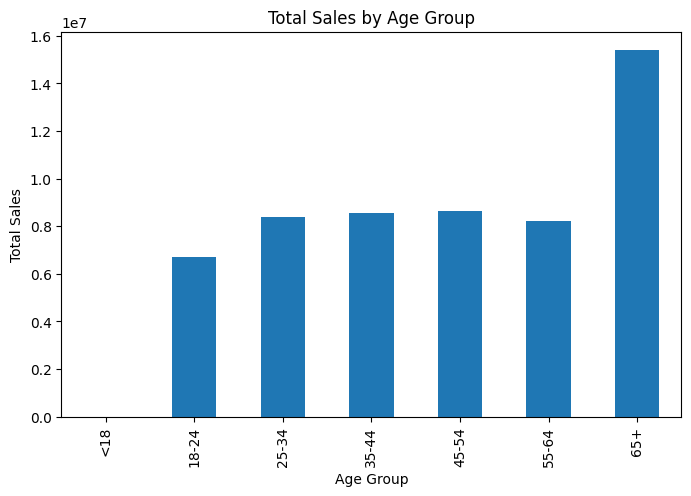

C:\Users\Home\AppData\Local\Temp\ipykernel_16736\2144935593.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_order = df_transactions.groupby('age_group')['Total_Price'].mean()


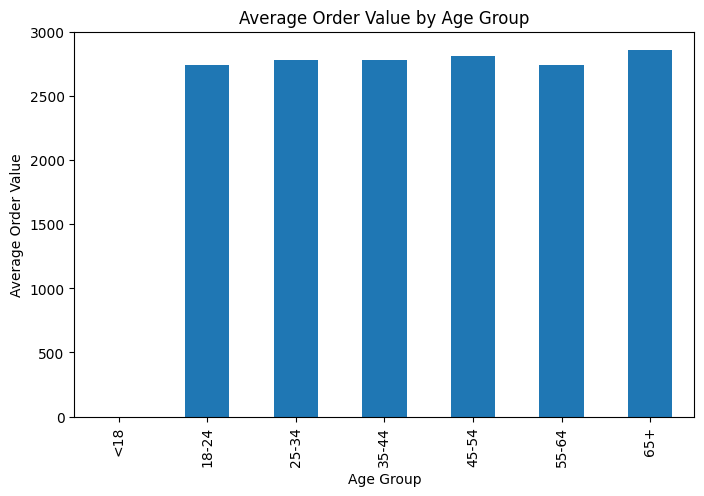

In [8]:

# 1. Age Group Analysis
if 'age' in df_transactions.columns:
    bins = [0, 18, 25, 35, 45, 55, 65, 100]
    labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_transactions['age_group'] = pd.cut(df_transactions['age'], bins=bins, labels=labels, right=False)
    
    # Customers by Age Group
    age_group_counts = df_transactions.groupby('age_group')['customer_id'].nunique()
    age_group_counts.plot(kind='bar', figsize=(8,5), title='Unique Customers by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Customers')
    plt.show()
    
    # Total Sales by Age Group
    age_group_sales = df_transactions.groupby('age_group')['Total_Price'].sum()
    age_group_sales.plot(kind='bar', figsize=(8,5), title='Total Sales by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Total Sales')
    plt.show()
    
    # Average Order Value by Age Group
    age_group_avg_order = df_transactions.groupby('age_group')['Total_Price'].mean()
    age_group_avg_order.plot(kind='bar', figsize=(8,5), title='Average Order Value by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Average Order Value')
    plt.show()

# 2. Customers by Stores
if 'store_id' in df_transactions.columns:
    store_customer_counts = df_transactions.groupby('store_id')['customer_id'].nunique().sort_values(ascending=False)
    store_customer_counts.plot(kind='bar', figsize=(12,6), title='Unique Customers per Store')
    plt.xlabel('Store ID')
    plt.ylabel('Unique Customers')
    plt.show()

# 3. Store Sales Performance
    # Average Sales per Store
    store_avg_sales = df_transactions.groupby('store_id')['Total_Price'].mean().sort_values(ascending=False)
    store_avg_sales.plot(kind='bar', figsize=(12,6), title='Average Sales Value per Store')
    plt.xlabel('Store ID')
    plt.ylabel('Average Sales Value')
    plt.show()
    
    # Top 5 Stores by Total Sales
    store_total_sales = df_transactions.groupby('store_id')['Total_Price'].sum().sort_values(ascending=False).head(5)
    store_total_sales.plot(kind='bar', figsize=(8,5), title='Top 5 Stores by Total Sales')
    plt.xlabel('Store ID')
    plt.ylabel('Total Sales')
    plt.show()

In [ ]:
# age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_transactions['age_group'] = pd.cut(df_transactions['age'], bins=bins, labels=labels, right=False)

# Identify returning customers
purchase_counts = df_transactions.groupby('customer_id').size().reset_index(name='purchase_count')
returning_customers = purchase_counts[purchase_counts['purchase_count'] > 1]['customer_id']

# Merge to get age group for returning customers
returning_df = df_transactions[df_transactions['customer_id'].isin(returning_customers)][['customer_id', 'age_group']].drop_duplicates()

# Count returning customers by age group
returning_by_agegroup = returning_df.groupby('age_group')['customer_id'].nunique().sort_values(ascending=False)

print(returning_by_agegroup)

age_group
65+      525
45-54    320
35-44    317
55-64    297
25-34    296
18-24    245
<18        0
Name: customer_id, dtype: int64


C:\Users\Home\AppData\Local\Temp\ipykernel_16736\2610518690.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returning_by_agegroup = returning_df.groupby('age_group')['customer_id'].nunique().sort_values(ascending=False)


Assuming if customer purchased from a store recently and Age of customer is above 65+, chances of future purchase is high

In [ ]:
snapshot_date = pd.Timestamp('2024-09-30')

df_transactions['Purchase_Date'] = pd.to_datetime(df_transactions['Purchase_Date'])
last_purchase['days_since_last'] = (snapshot_date - last_purchase['Purchase_Date']).dt.days

# Customers with days_since_last < 30 
likely_customers = last_purchase[last_purchase['days_since_last'] < 30]

In [22]:
likely_customers.value_counts()

customer_id  Purchase_Date  days_since_last
C999         2024-09-03     27                 1
C1           2024-09-03     27                 1
C10          2024-09-13     17                 1
C100         2024-09-18     12                 1
C1001        2024-09-23     7                  1
                                              ..
C1012        2024-09-23     7                  1
C101         2024-09-18     12                 1
C1008        2024-09-21     9                  1
C1006        2024-09-11     19                 1
C1005        2024-09-12     18                 1
Name: count, Length: 1078, dtype: int64

In [ ]:
snapshot_date = pd.Timestamp('2024-09-30')
df_transactions['Purchase_Date'] = pd.to_datetime(df_transactions['Purchase_Date'])

# Get last purchase per customer
last_purchase = df_transactions.groupby('customer_id')['Purchase_Date'].max().reset_index()
# Calculate days since last purchase
last_purchase['days_since_last'] = (snapshot_date - last_purchase['Purchase_Date']).dt.days
# Get customer ages 
customer_age = df_transactions[['customer_id', 'age']].drop_duplicates()
# Merge age into last_purchase
last_purchase = last_purchase.merge(customer_age, on='customer_id', how='left')
# Filter likely customers (days_since_last < 30 and age > 65)
likely_senior_customers = last_purchase[(last_purchase['days_since_last'] < 30) & (last_purchase['age'] > 65)]

print(likely_senior_customers)

     customer_id Purchase_Date  days_since_last  age
4          C1001    2024-09-23                7   72
11         C1008    2024-09-21                9   73
13          C101    2024-09-18               12   80
23         C1019    2024-09-14               16   72
27         C1022    2024-09-21                9   77
...          ...           ...              ...  ...
1983        C984    2024-09-05               25   66
1984        C985    2024-09-18               12   77
1989         C99    2024-09-03               27   70
1993        C993    2024-09-12               18   76
1994        C994    2024-09-16               14   78

[267 rows x 4 columns]
